In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\crop_production.csv") #go to the csv file and then copy the path 

In [4]:
df.shape

(246091, 7)

In [5]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [6]:
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (246091, 7)
                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [7]:
print(df.isnull().sum())

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


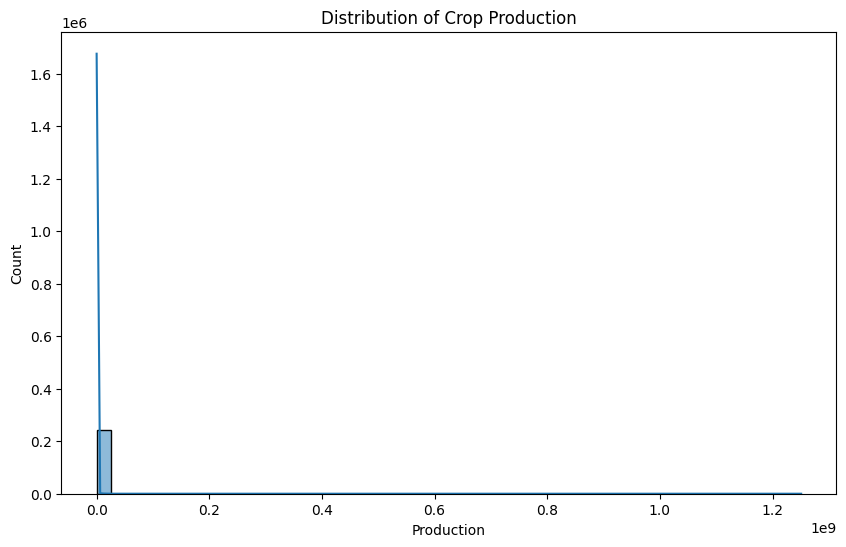

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['Production'], bins=50, kde=True)
plt.title("Distribution of Crop Production")
plt.show()

In [9]:
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

In [10]:
print("Columns in dataset:", df.columns)

Columns in dataset: Index(['state_name', 'district_name', 'crop_year', 'season', 'crop', 'area',
       'production'],
      dtype='object')


In [11]:
df = df.dropna(subset=["crop_year", "crop", "area", "production"])
df = df[df["area"] > 0]              # remove invalid areas
df = df[df["production"] >= 0]       # remove negative production

In [12]:
df["yield_t_per_ha"] = df["production"] / df["area"]

In [13]:
print("Rows after cleaning:", df.shape[0])
print("Years range:", df["crop_year"].min(), "to", df["crop_year"].max())
print("Unique crops:", df["crop"].nunique())

Rows after cleaning: 242361
Years range: 1997 to 2015
Unique crops: 124


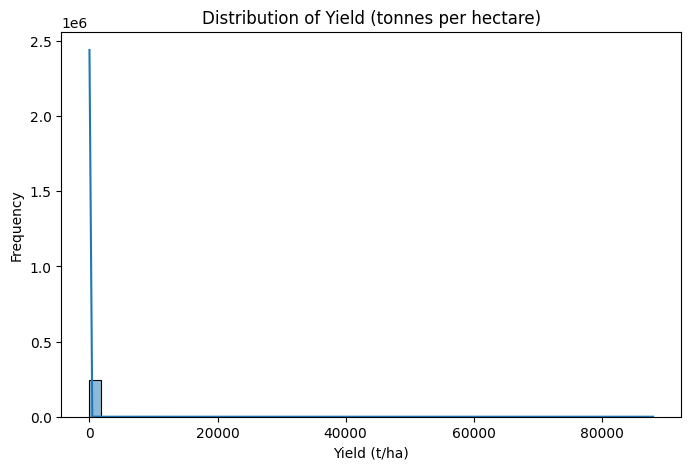

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df["yield_t_per_ha"], bins=50, kde=True)
plt.title("Distribution of Yield (tonnes per hectare)")
plt.xlabel("Yield (t/ha)")
plt.ylabel("Frequency")
plt.show()

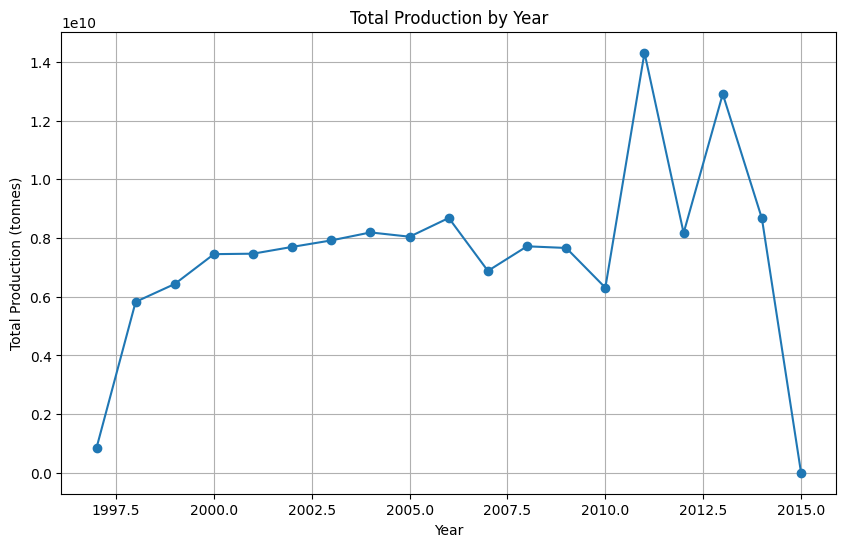

In [15]:
yearly_prod = df.groupby("crop_year")["production"].sum().sort_index()
plt.figure(figsize=(10,6))
yearly_prod.plot(kind="line", marker="o")
plt.title("Total Production by Year")
plt.ylabel("Total Production (tonnes)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

In [18]:
df.to_csv("crop_yield_cleaned.csv", index=False)

print("✅ Cleaned dataset saved as crop_yield_cleaned.csv")

✅ Cleaned dataset saved as crop_yield_cleaned.csv
